In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as st
from IPython.display import display
from sklearn.linear_model import LinearRegression

from common_plotting import read_data, plot
from common_analysis_resistance import (analyse_ohms, filter_acal_points, add_sr104_temp, add_pt100_temp, correct_sr104, interpolate_temp)


plt.rcParams["figure.figsize"] = (20,10)

In [2]:
thp_data, data = read_data(['ks3458a-4w-res-log.csv', 'ks3458a-2w-res-log.csv', 'ks3458a-4w-res-w-delay-log.csv'])
res_2w = data['ks3458a-2w-res-log.csv']
res_4w = pd.concat([data['ks3458a-4w-res-log.csv'], data['ks3458a-4w-res-w-delay-log.csv']])

In [3]:
res_4w_results = analyse_ohms(res_4w)
res_2w_results = analyse_ohms(res_2w)

In [4]:
res_4w_results[(res_4w_results.dut == 'SR104') & (res_4w_results.range == 10000)]

,dut,dut_setting,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,,
23,SR104,10 kOhm,19,10000.048989,0.000218,0.000949,10000.0,37.836020
25,SR104,10 kOhm,23,10000.050774,0.000192,0.000920,10000.0,37.784630
32,SR104,10 kOhm,72,10000.026283,0.000513,0.004354,10000.0,38.268837
36,SR104,10 kOhm,33,10000.021148,0.000568,0.003263,10000.0,38.368661
39,SR104,10 kOhm,95,10000.027913,0.000805,0.007844,10000.0,38.130769
53,SR104,10 kOhm,25,10000.021682,0.000145,0.000723,10000.0,39.922625
118,SR104,10 kOhm,26,10000.027959,0.000187,0.000955,10000.0,34.202006
120,SR104,10 kOhm,83,10000.006031,0.000341,0.003110,10000.0,38.738069
128,SR104,10 kOhm,10,10000.014187,0.000347,0.001098,10000.0,36.019707


In [5]:
res_4w_results

,dut,dut_setting,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,,
1,Guildline 9330,100 kOhm,2,1.000035e+05,0.050750,0.071771,100000.0,32.991504
3,Fluke 742A,1 Ohm,19,1.000050e+00,0.000002,0.000007,10.0,32.246351
4,HP 11103A,1 kOhm,21,1.000021e+03,0.000153,0.000701,1000.0,32.380255
5,Guildline 9330,100 kOhm,41,1.000057e+05,0.021629,0.138496,100000.0,33.284156
6,HP 11103A,1 kOhm,23,1.000022e+03,0.000139,0.000668,1000.0,33.611320
...,...,...,...,...,...,...,...,...
183,Fluke 5450A,100 kOhm,81,1.000059e+05,0.016716,0.150445,1000000.0,27.985583
184,Fluke 5450A,1 MOhm,32,1.000049e+06,0.837165,4.735719,1000000.0,28.101331
185,Fluke 742A,1 MOhm,28,1.000033e+06,0.014313,0.075738,1000000.0,28.008719


In [6]:
res_4w_results[res_4w_results.range==10000.0]

,dut,dut_setting,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,,
13,HP 11103A,1 kOhm,13,1000.023311,0.000242,0.000874,10000.0,30.607242
14,GR1440-2,10 kOhm,14,10051.796610,0.000946,0.003540,10000.0,31.181836
15,GR1440-3,10 kOhm,24,9999.919127,0.000620,0.003037,10000.0,31.830225
16,GR1440-4,10 kOhm,34,10001.285458,0.000228,0.001328,10000.0,31.978309
23,SR104,10 kOhm,19,10000.048989,0.000218,0.000949,10000.0,37.836020
25,SR104,10 kOhm,23,10000.050774,0.000192,0.000920,10000.0,37.784630
26,GR1440-2,10 kOhm,18,10051.760228,0.000258,0.001094,10000.0,37.824382
27,GR1440-3,10 kOhm,23,9999.723406,0.000203,0.000972,10000.0,37.899847
28,GR1440-4,10 kOhm,18,10001.188416,0.000215,0.000912,10000.0,38.020584


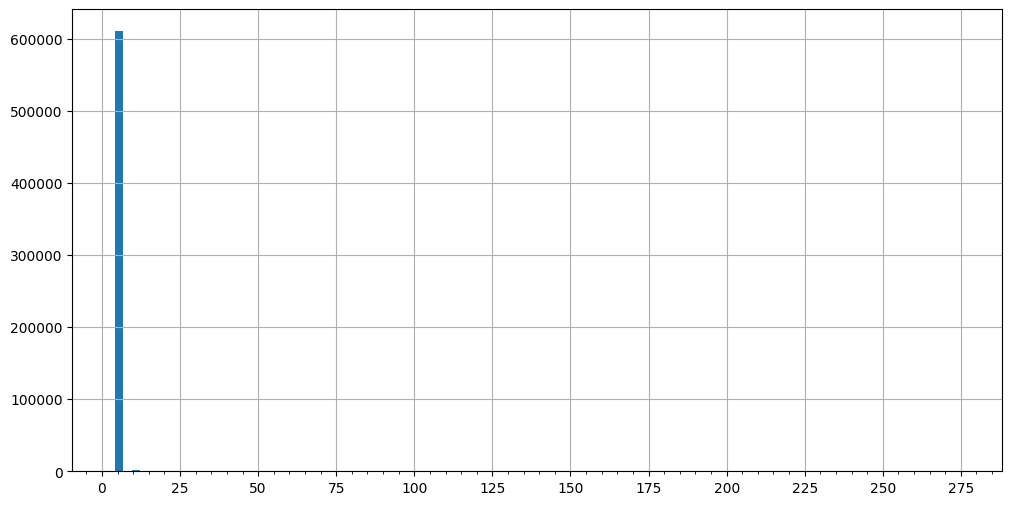

In [7]:
diff_2w = (res_2w.reset_index()['datetime'] - res_2w.reset_index()['datetime'].shift(1))
diff_2w = diff_2w[diff_2w < pd.Timedelta(minutes=5)]
fig = plt.figure(figsize=(12,6))
diff_2w.dt.total_seconds().hist(bins=100)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(5))

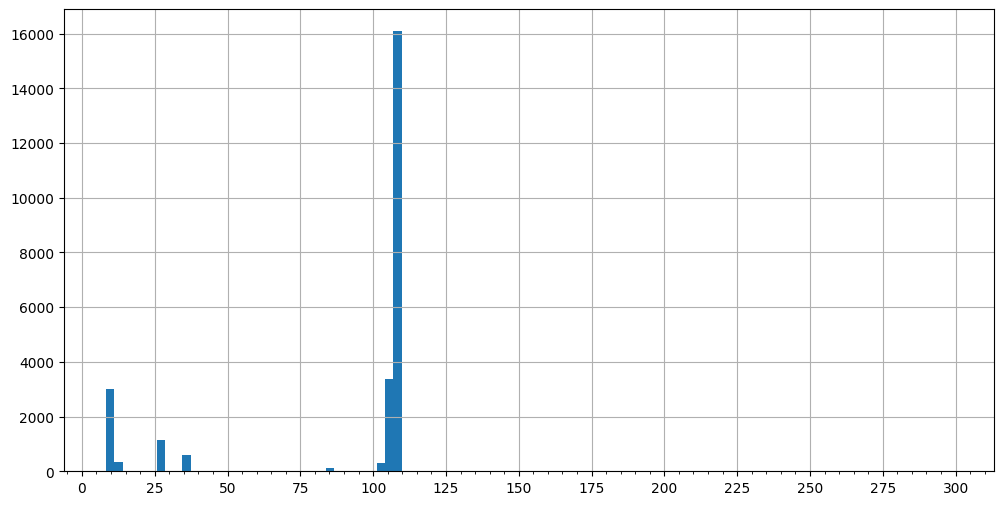

In [8]:
diff_4w = (res_4w.reset_index()['datetime'] - res_4w.reset_index()['datetime'].shift(1))
diff_4w = diff_4w[diff_4w < pd.Timedelta(minutes=5)]
fig = plt.figure(figsize=(12,6))
diff_4w.dt.total_seconds().hist(bins=100)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(5))

In [9]:
print(res_4w_results[(res_4w_results.dut == 'SR104') | (res_4w_results.dut == 'Fluke 5450A')].tail(20))

               dut dut_setting  count      ohm_mean   ohm_sem   ohm_std  \
group                                                                     
161          SR104     10 kOhm     32  1.000004e+04  0.000203  0.001149   
162    Fluke 5450A     10 kOhm     28  1.000042e+04  0.000222  0.001176   
163          SR104     10 kOhm     92  1.000004e+04  0.000446  0.004280   
164    Fluke 5450A     10 kOhm   3650  1.000045e+04  0.000067  0.004026   
165          SR104     10 kOhm   2854  1.000005e+04  0.000105  0.005592   
166    Fluke 5450A     10 kOhm   7736  1.000045e+04  0.000256  0.022543   
167          SR104     10 kOhm    345  1.000007e+04  0.000208  0.003857   
168    Fluke 5450A     10 kOhm    387  1.000047e+04  0.000192  0.003778   
169          SR104     10 kOhm     48  1.000007e+04  0.000423  0.002931   
172    Fluke 5450A       1 Ohm     24  9.998226e-01  0.000002  0.000009   
173    Fluke 5450A      10 Ohm     23  9.999507e+00  0.000002  0.000007   
175    Fluke 5450A      1

In [10]:
res_2w_results

,dut,dut_setting,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,,
1,Keithley 5155,1.0 GOhm,1,9.795073e+08,NaN,NaN,1.000000e+09,33.420703
2,Guildline 95206,10 MOhm,23,9.999141e+06,165.846003,795.369491,1.000000e+07,33.246026
3,Keithley 5155-guard-lo,1 GOhm,40,9.955731e+08,17105.645965,108185.604194,1.000000e+09,32.729536
4,Keithley 5155-guard-open,1 GOhm,40,9.963116e+08,37016.161240,234110.759510,1.000000e+09,32.926118
5,SR104,10 kOhm,49,1.000005e+04,0.000087,0.000612,1.000000e+04,37.393754
...,...,...,...,...,...,...,...,...
60,Guildline 9330,1 MOhm,91,1.000052e+06,0.022287,0.212601,1.000000e+06,27.768718
61,Fluke 5450A,1 MOhm,76,1.000056e+06,0.678979,5.919198,1.000000e+07,28.044107
62,Fluke 5450A,10 MOhm,27,1.000058e+07,6.470978,33.624187,1.000000e+07,28.118207


In [11]:
res_2w_results[res_2w_results.dut == 'Guildline 95206']

,dut,dut_setting,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,,
2,Guildline 95206,10 MOhm,23,9.999141e+06,165.846003,795.369491,10000000.0,33.246026
8,Guildline 95206,10 MOhm,191,1.000067e+07,0.445146,6.152039,10000000.0,38.743398
12,Guildline 95206,10 MOhm,410,1.000051e+07,1.745363,35.340917,10000000.0,39.686418
20,Guildline 95206,10 MOhm,285,1.000038e+07,0.311602,5.260439,10000000.0,34.145824
31,Guildline 95206,10 MOhm,102,1.000034e+07,6.631496,66.974829,10000000.0,36.856430
36,Guildline 95206,10 MOhm,136,1.000043e+07,0.117317,1.368142,10000000.0,37.386172
44,Guildline 95206,10 MOhm,99,1.000061e+07,47.838293,475.985006,10000000.0,37.652002
64,Guildline 95206,10 MOhm,118,1.000041e+07,0.509449,5.534029,10000000.0,28.252332


In [12]:
res_2w_results[(res_2w_results.dut == 'P4017') | (res_2w_results.dut == 'P410')]

,dut,dut_setting,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,,
11,P4017,10 MOhm,154,1.000005e+07,5.453510,67.676275,10000000.0,39.779197
30,P4017,10 MOhm,38,1.000002e+07,4.204487,25.918201,10000000.0,33.888502
32,P4017,10 MOhm,42,1.000012e+07,3.267533,21.176035,10000000.0,39.238728
37,P4017,10 MOhm,531,1.000013e+07,0.502107,11.570281,10000000.0,37.705457
43,P4017,10 MOhm,262,1.000012e+07,0.759286,12.290112,10000000.0,37.613620
45,P4017,10 MOhm,596,1.000017e+07,4.228532,103.231627,10000000.0,30.305671


# Temperature coefficients

## P4017

In [13]:
data = read_data(['ks3458a-time-p4017-10M-601-log.csv'])
p4017_data = data[1]['ks3458a-time-p4017-10M-601-log.csv']
thp = data[0]

ag3458a_2_ohm: min/max : 9.995614e+06/1.000612e+07 V, mean (std): 1.000007e+07 V (8.877720e+01 V)


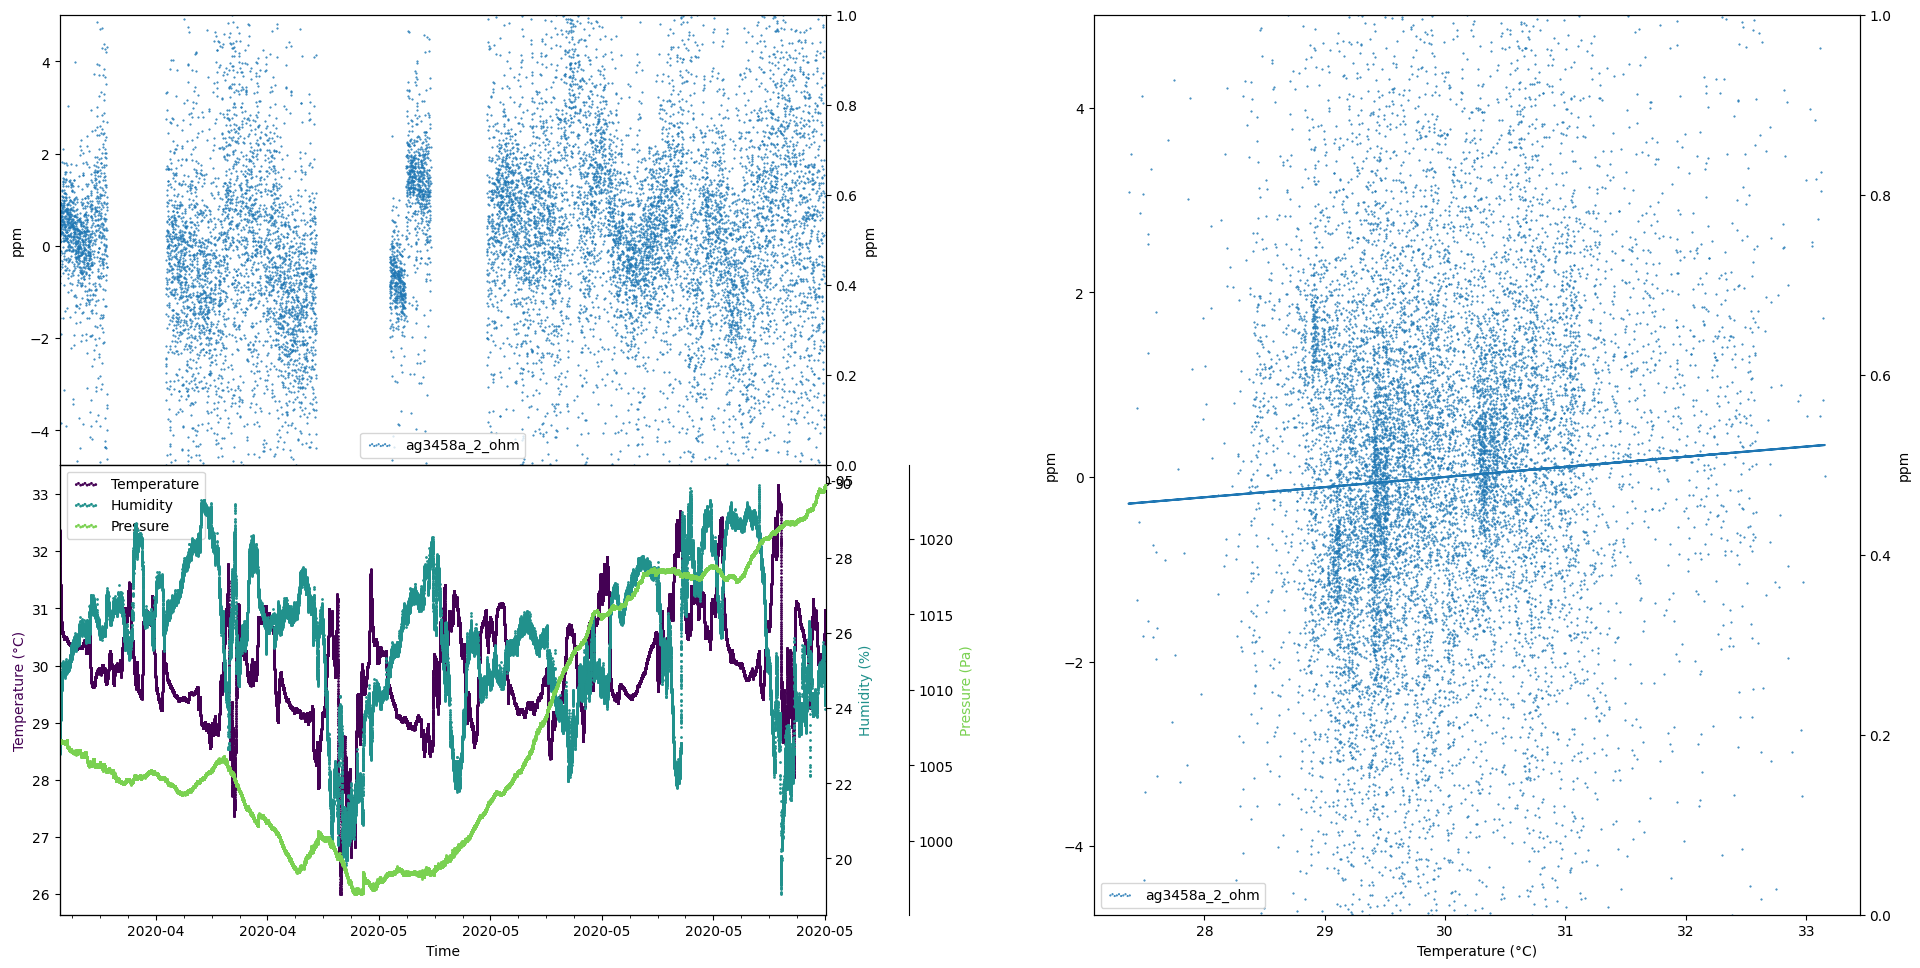

In [14]:
plot(thp, p4017_data, ['ag3458a_2_ohm'], [] )

## Comparing 3458A with and without ACAL

In [15]:
thp_data, data = read_data(['ks3458a1-k2000-x2-sr104-log.csv', 'ks3458a1-wo-acal-k2000-x2-sr104-log.csv', 'ks3458a-k2000-x2-sr104-log.csv', 'ks3458a-wo-acal-k2000-x2-sr104-log.csv', 'ks3458a-dcv-tc-log-w-acal.csv'])
ks3458a2_w_acal = data['ks3458a-k2000-x2-sr104-log.csv']
ks3458a2_wo_acal = data['ks3458a-wo-acal-k2000-x2-sr104-log.csv']
ks3458a1_w_acal = data['ks3458a1-k2000-x2-sr104-log.csv']
ks3458a1_wo_acal = data['ks3458a1-wo-acal-k2000-x2-sr104-log.csv']
ks3458a_dc_w_acal = data['ks3458a-dcv-tc-log-w-acal.csv']

In [16]:
def clean_data(data, ks3458a_number):
    cleaned_data = data.copy()
    add_sr104_temp(cleaned_data, 'k2000_temp_ohm')
    add_pt100_temp(cleaned_data, 'k2000_20_pt100_ohm')
    correct_sr104(cleaned_data, f'ag3458a_{ks3458a_number}_ohm', 'k2000_temp_degC')
#     make_sr104_relative(data, 'ag3458a_2_ohm_corrected')
    interpolate_temp(cleaned_data, f'temp_{ks3458a_number}')
    cleaned_data.drop(['k2000_temp_ohm', 'k2000_20_pt100_ohm', f'ag3458a_{ks3458a_number}_ohm', f'temp_{ks3458a_number}'], axis=1, inplace=True)
    return cleaned_data


def plot_sr104(data, ppm_column, ks3458a_temp_column, ks3458a_number, with_acal):
    acal_data = filter_acal_points(data, ks3458a_number)
    
    fig = plt.figure()
    ax = plt.gca()
    lns = []
    lns.append(ax.plot(data.index, data[ppm_column], '.', color='lightblue', label='SR104 deviation (ppm)')[0])
    lns.append(ax.plot(acal_data.index, acal_data[ppm_column], 'o', color='purple', label='SR104 deviation ACAL (ppm)')[0])
    y2 = ax.twinx()
    lns.append(y2.plot(data.index, data[ks3458a_temp_column], '.', color='red', label='temperature')[0])
    ax.set_title(f'Resistance and temperature over time {"with" if with_acal else "without"} ACAL')
    ax.legend(handles=lns)
    ax.set_xlabel('Time')
    ax.set_ylabel('Resistance relative to corrected nominal value (uOhm/Ohm)')
    y2.set_ylabel('Temperature (°C)')
    
    fit_data = data.dropna()
    regressor = LinearRegression()
    regressor.fit(fit_data[ks3458a_temp_column].values.reshape(-1, 1), fit_data[ppm_column])
    temps = np.arange(data[ks3458a_temp_column].min(), data[ks3458a_temp_column].max(), 0.1)
    fig2 = plt.figure()
    plt.plot(data[ks3458a_temp_column], data[ppm_column], '.', color='lightblue', label="Measurement")
    plt.plot(acal_data[ks3458a_temp_column], acal_data[ppm_column], 'o', color='purple', label="ACAL")
    plt.plot(temps, regressor.predict(temps.reshape(-1, 1)), color='orange', label="Linear fit")
    plt.title(f'Resistance function temperature coefficient {"with" if with_acal else "without"} ACAL')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Resistance relative to corrected nominal value (uOhm/Ohm)')
    plt.legend()
    plt.text(data[ks3458a_temp_column].min(), data[ppm_column].min(), f"TC = {regressor.coef_[0]:.2f} ppm/°C")

def plot_ks3458a_r207_tempco(data, ppm_column, ks3458a_temp_column, ks3458a_number):
    acal_data = filter_acal_points(data, ks3458a_number)
    plt.figure()
    fit_data = acal_data.dropna()
    regressor = LinearRegression()
    regressor.fit(fit_data[ks3458a_temp_column].values.reshape(-1, 1), fit_data[ppm_column])
    temps = np.arange(acal_data[ks3458a_temp_column].min(), acal_data[ks3458a_temp_column].max(), 0.1)
    plt.title('R207 temperature coefficient')
    plt.plot(acal_data[ks3458a_temp_column], acal_data[ppm_column], 'o', label='Measurement at ACAL')
    plt.plot(temps, regressor.predict(temps.reshape(-1, 1)), label="Linear fit")
    plt.legend()
    plt.ylabel('R207 relative change (uOhm/Ohm)')
    plt.xlabel('Temperature (°C)')
    plt.text(acal_data[ks3458a_temp_column].min(), acal_data[ppm_column].min(), f"TC = {regressor.coef_[0]:.2f} ppm/°C")

def process_sr104_k2000x2(data, ks3458a_number, with_acal):
    cleaned = clean_data(data, ks3458a_number)
    plot_sr104(cleaned, f'ag3458a_{ks3458a_number}_ppm', f'temp_{ks3458a_number}_interpolated', ks3458a_number, with_acal)
    if with_acal:
        plot_ks3458a_r207_tempco(cleaned, f'ag3458a_{ks3458a_number}_ppm', f'temp_{ks3458a_number}_interpolated', ks3458a_number)
        

### HP 3458A #1
#### With ACAL

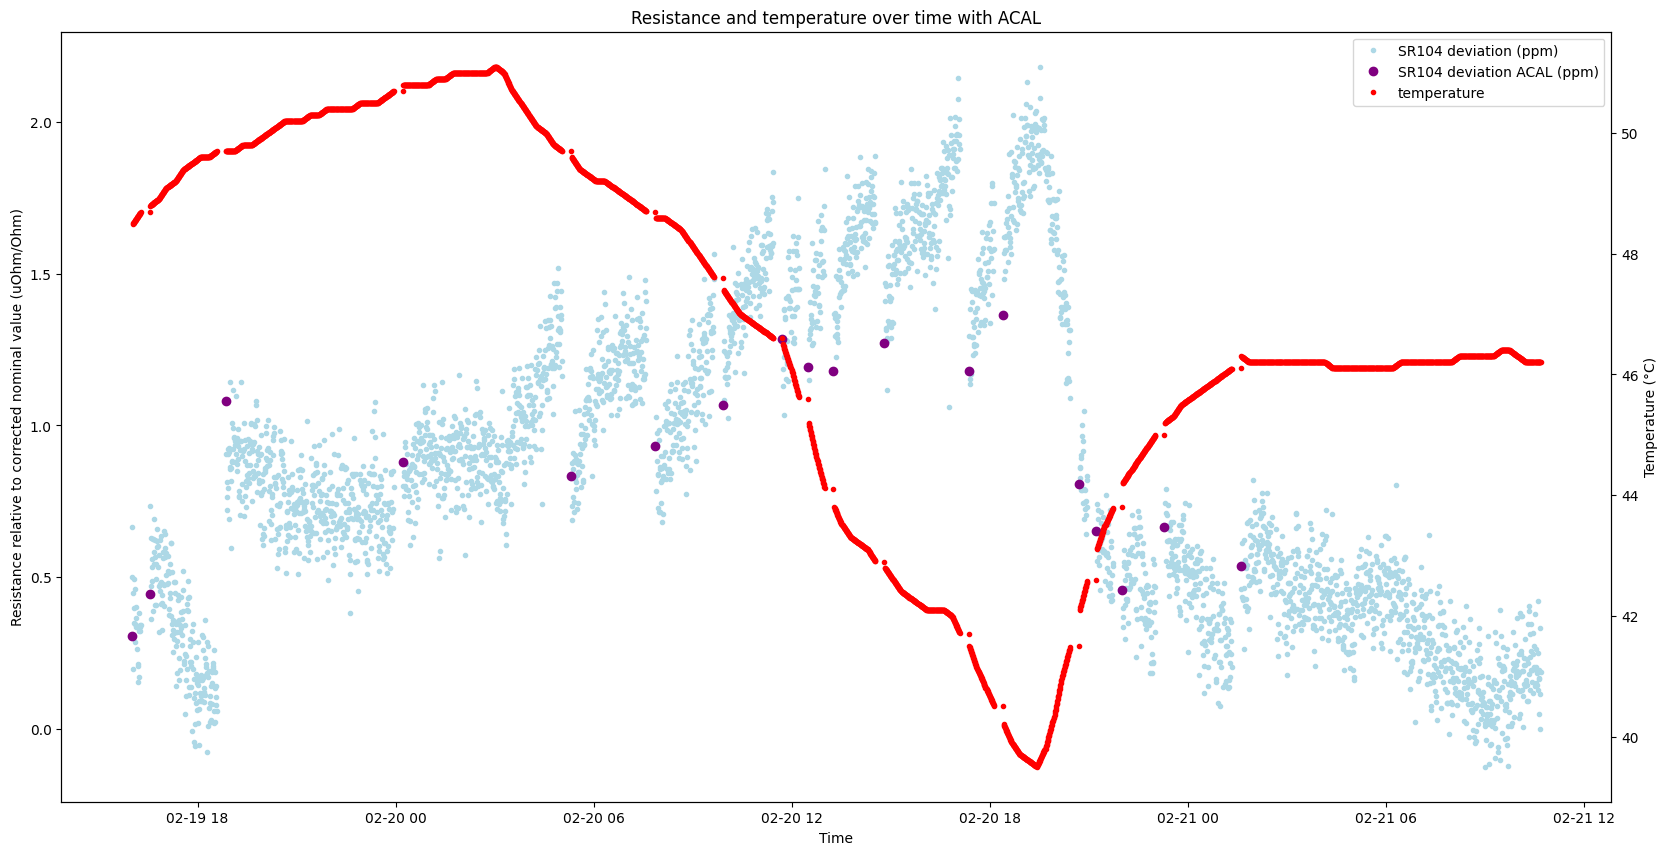

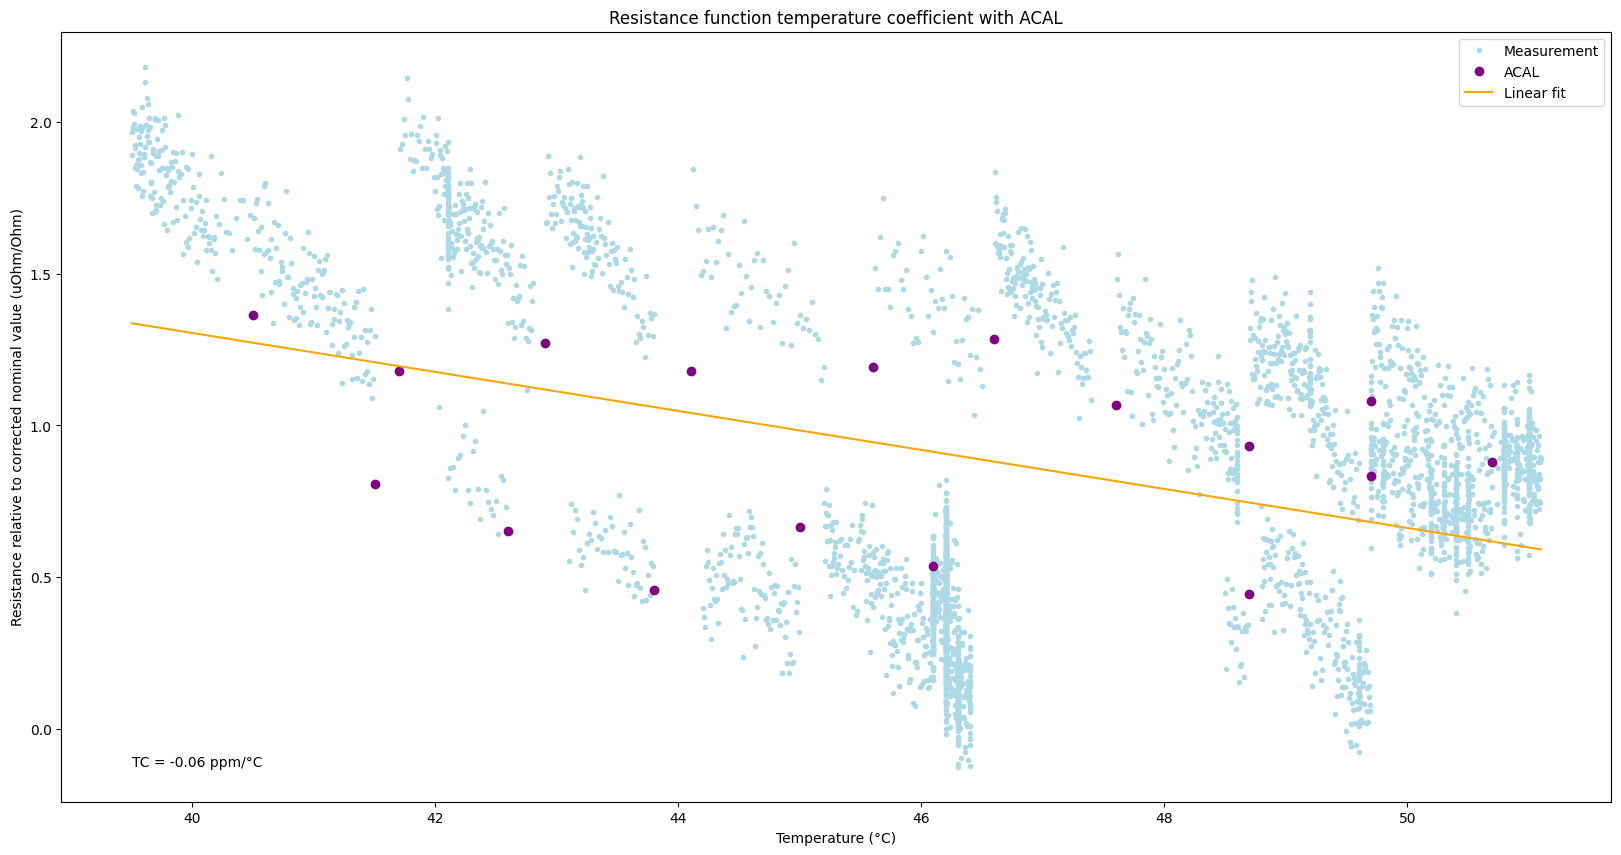

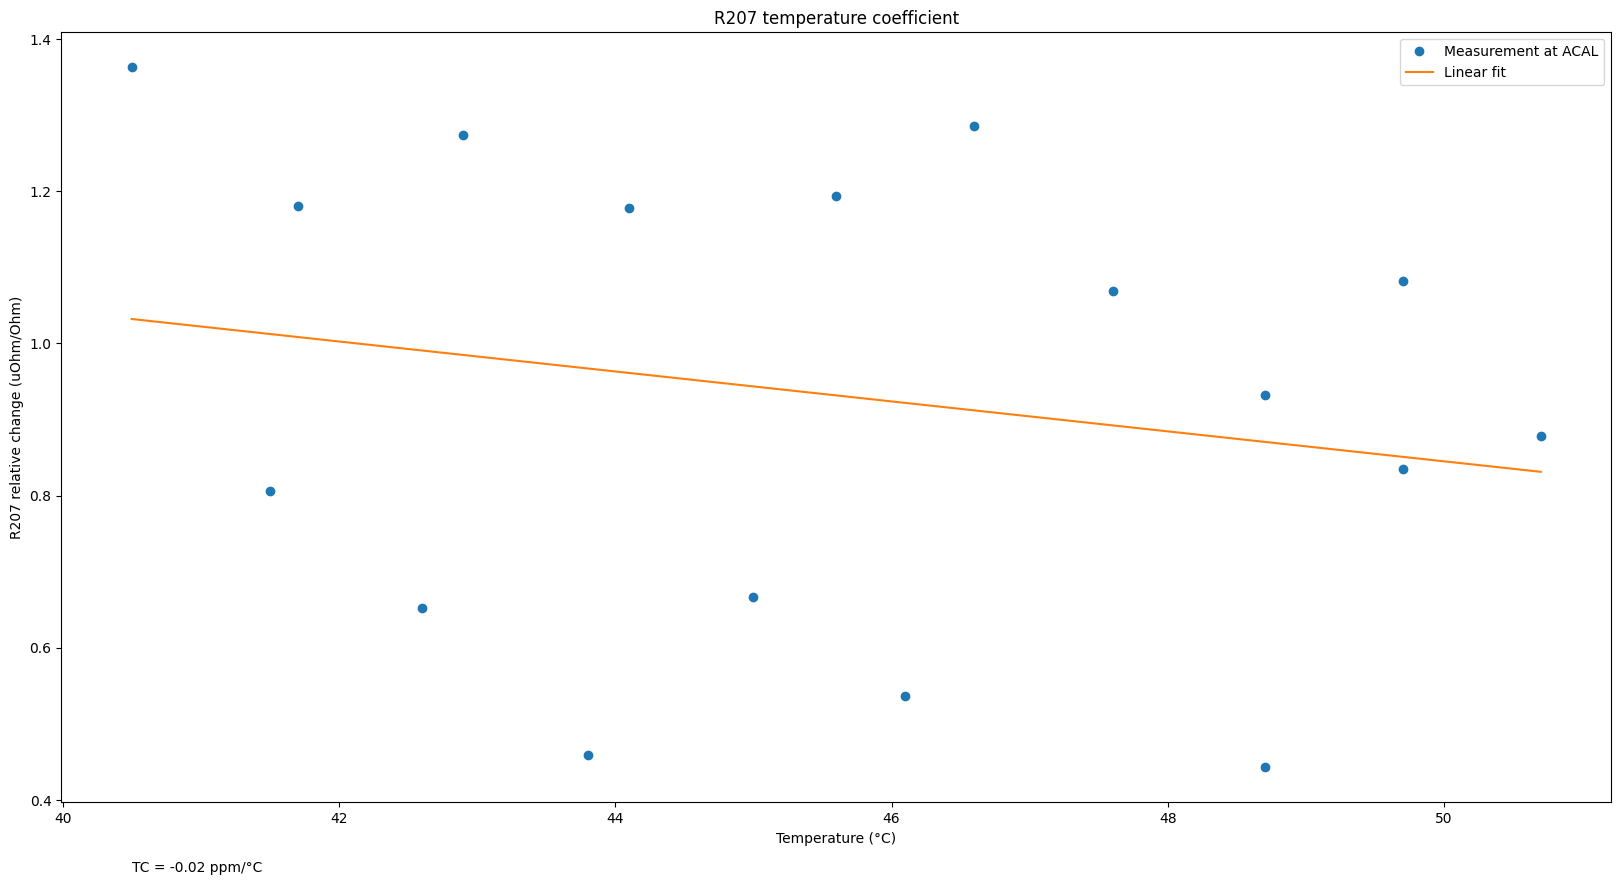

In [17]:
process_sr104_k2000x2(ks3458a1_w_acal[ks3458a1_w_acal.index > pd.Timestamp(2023,2,19,16)], 1, True)

#### Without ACAL

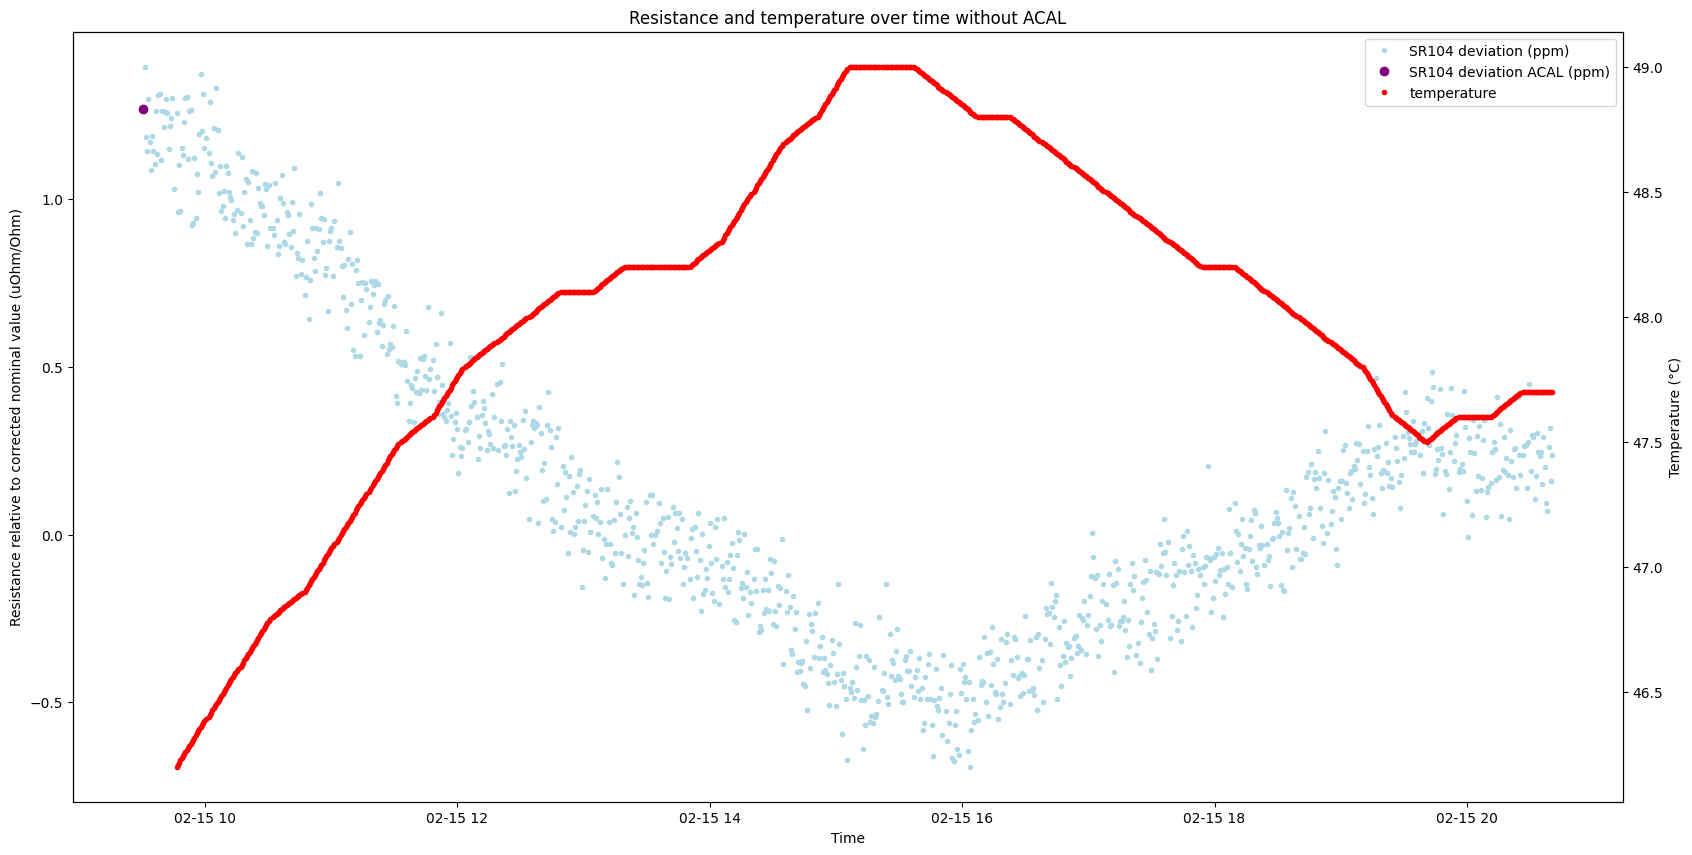

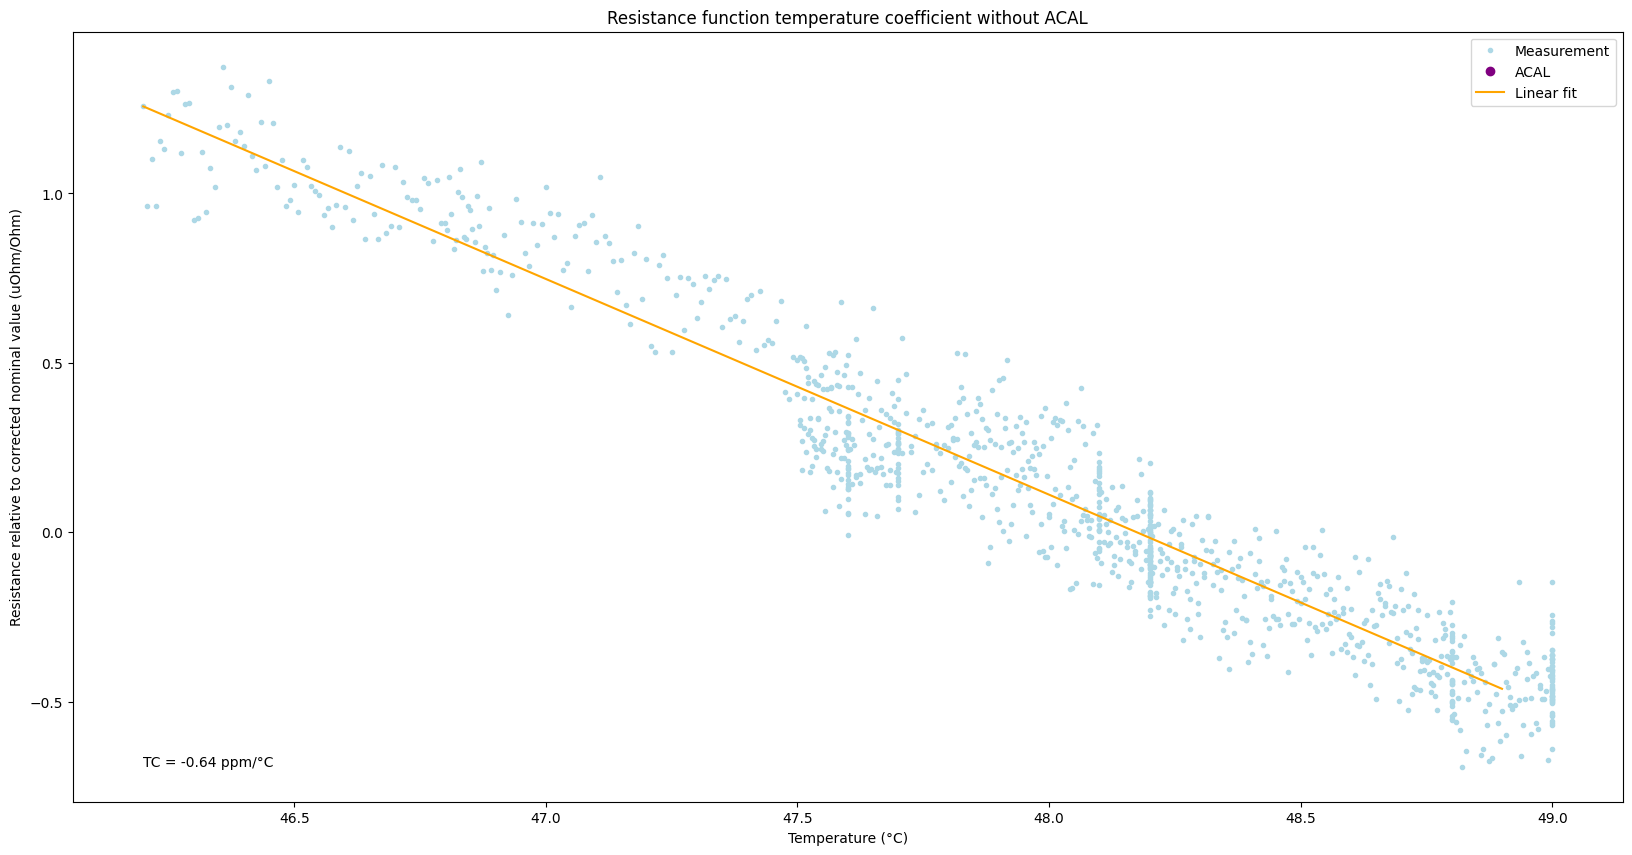

In [18]:
process_sr104_k2000x2(ks3458a1_wo_acal[(ks3458a1_wo_acal.index > pd.Timestamp(2023,2,15,9,15)) & (ks3458a1_wo_acal.index < pd.Timestamp(2023,2,15,21))], 1, False)

## HP 3458A #2
#### With ACAL

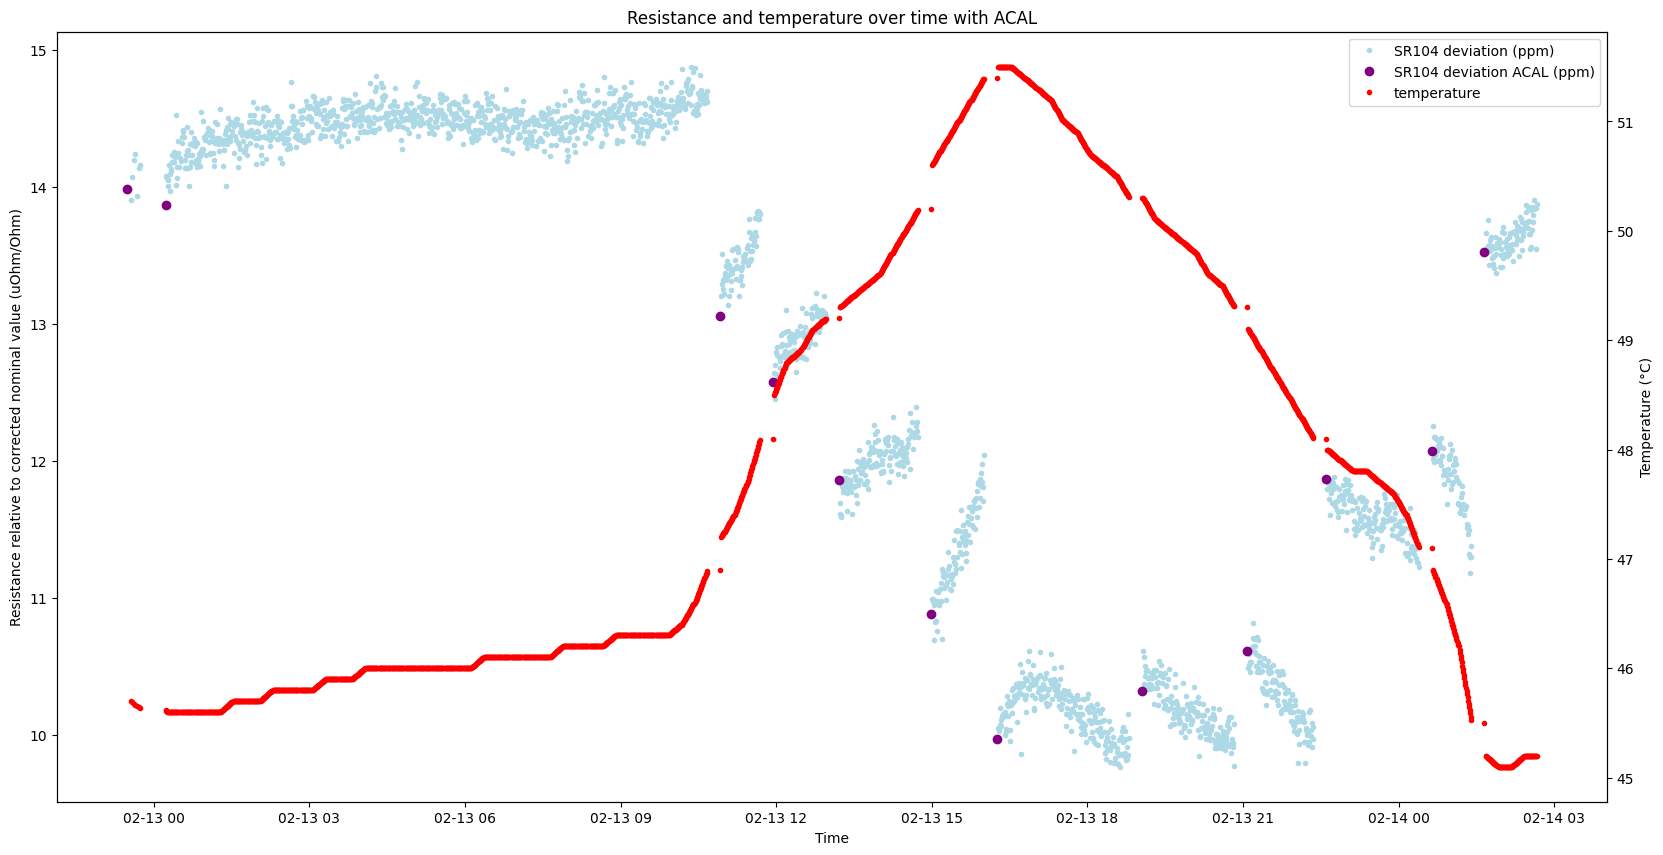

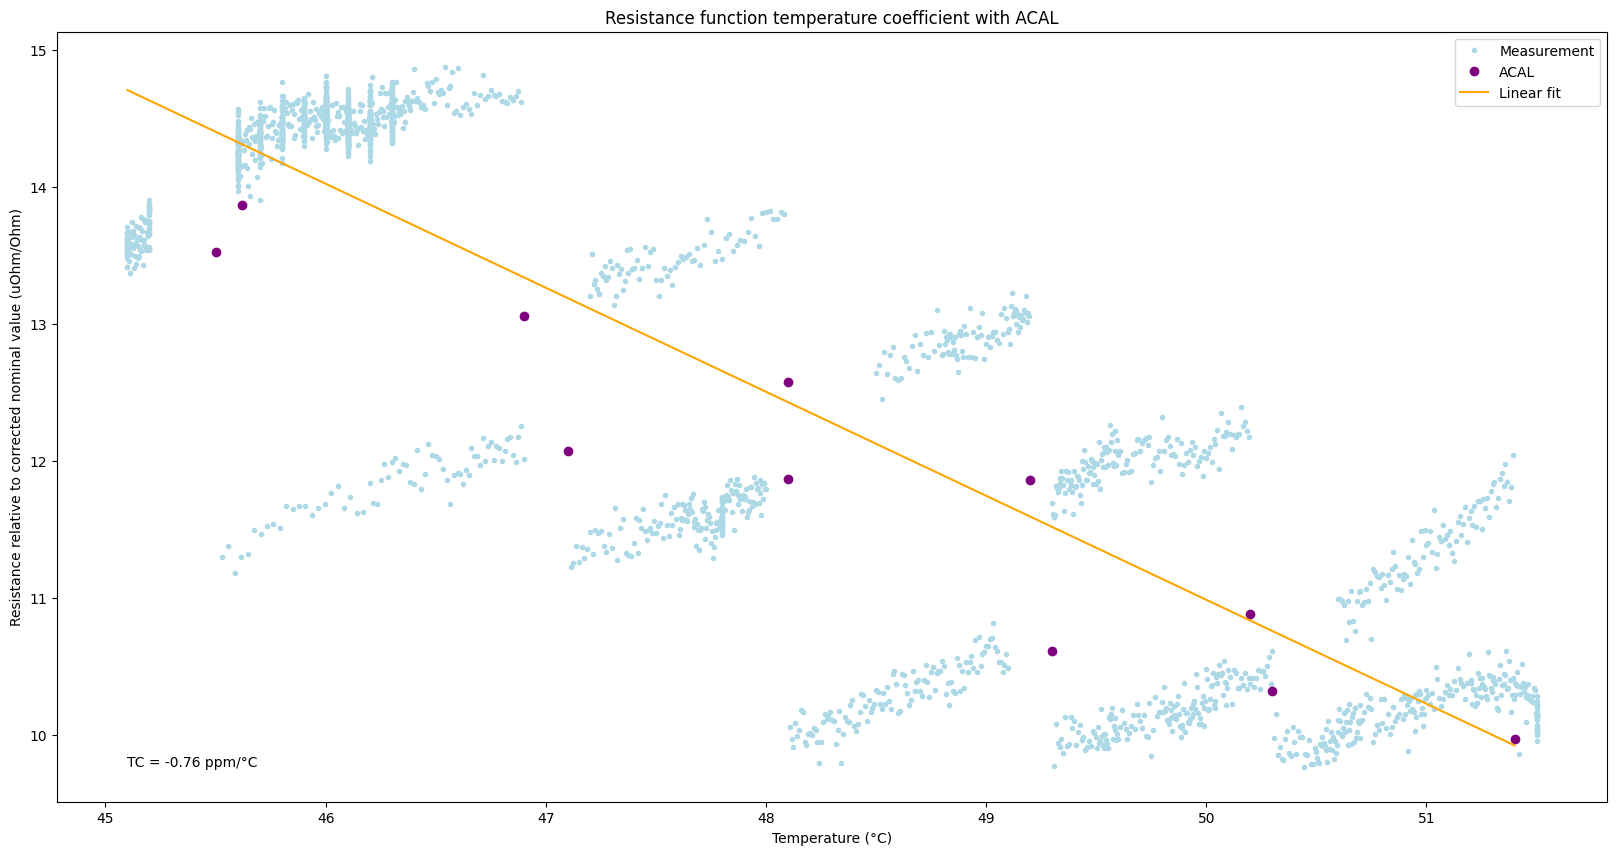

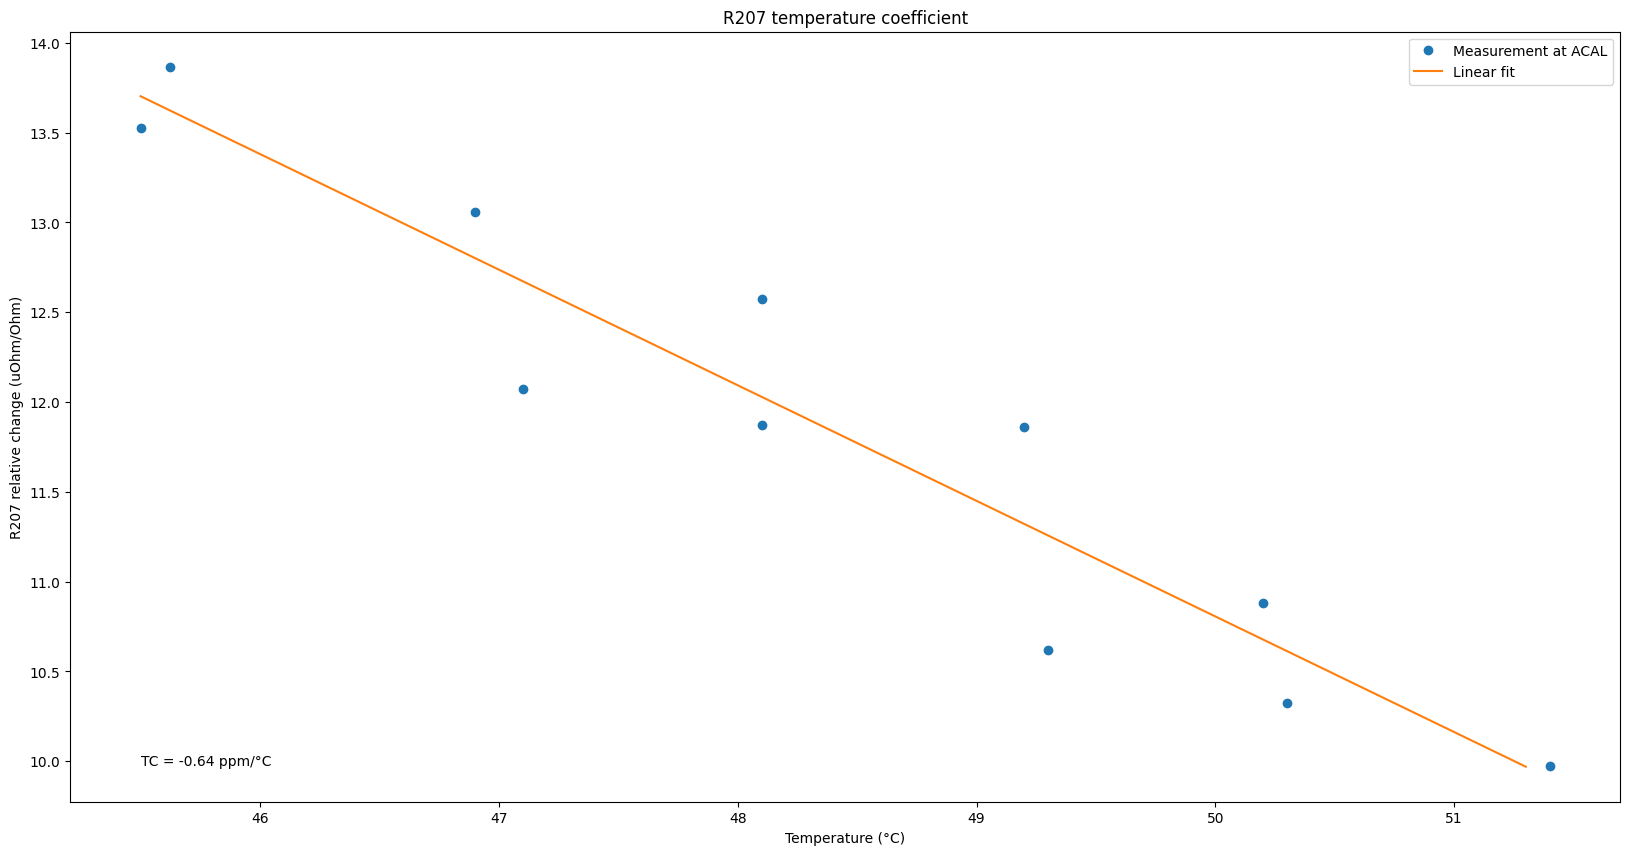

In [19]:
process_sr104_k2000x2(ks3458a2_w_acal, 2, True)

#### Without ACAL

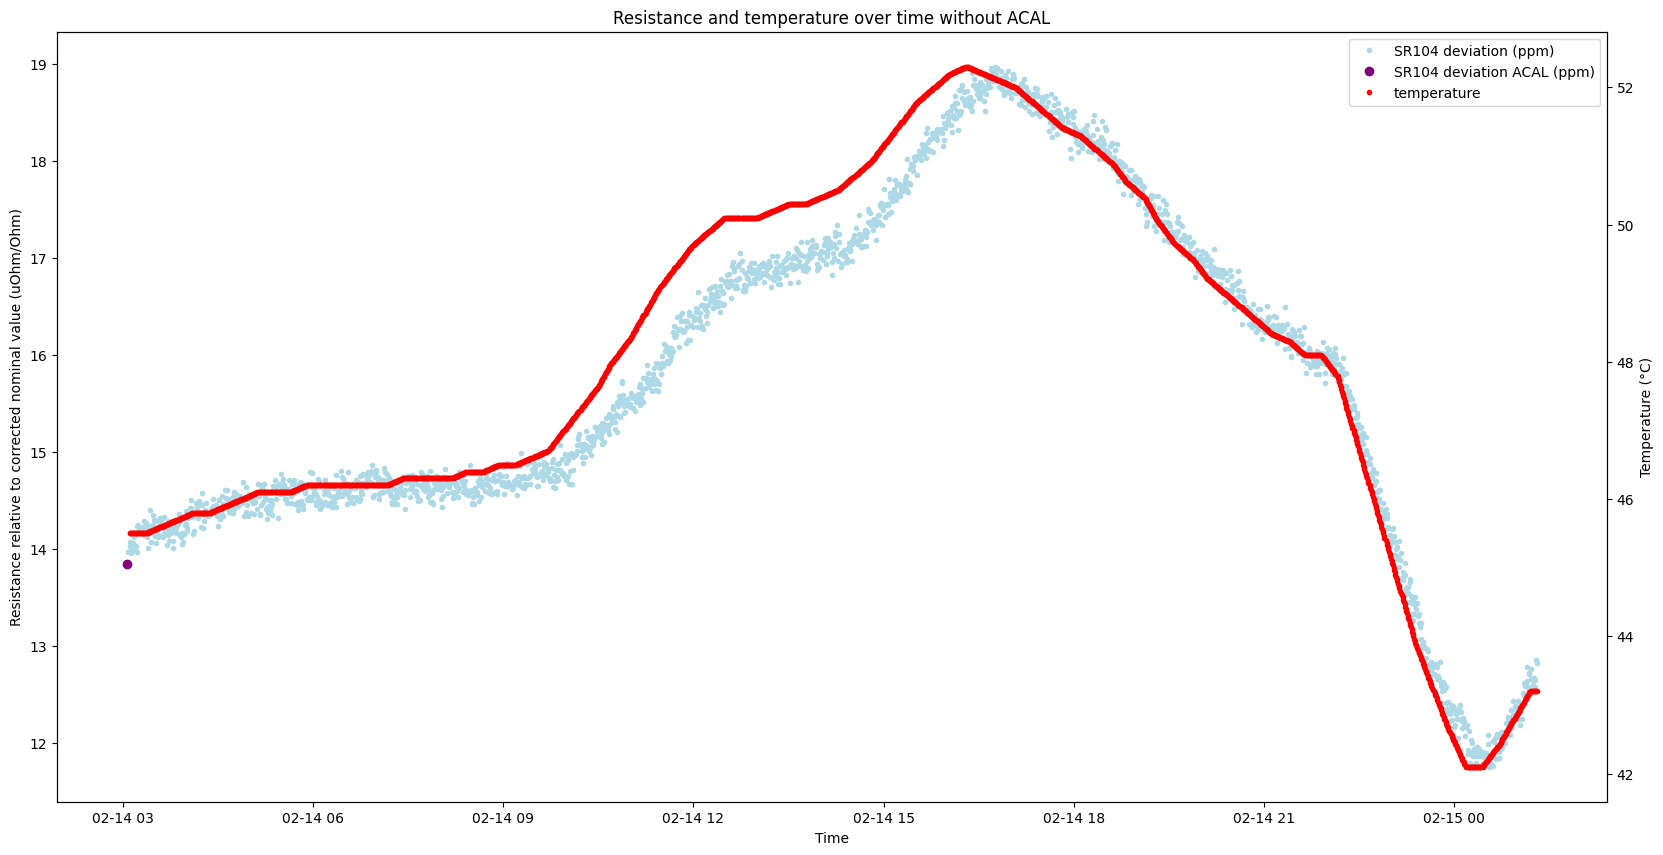

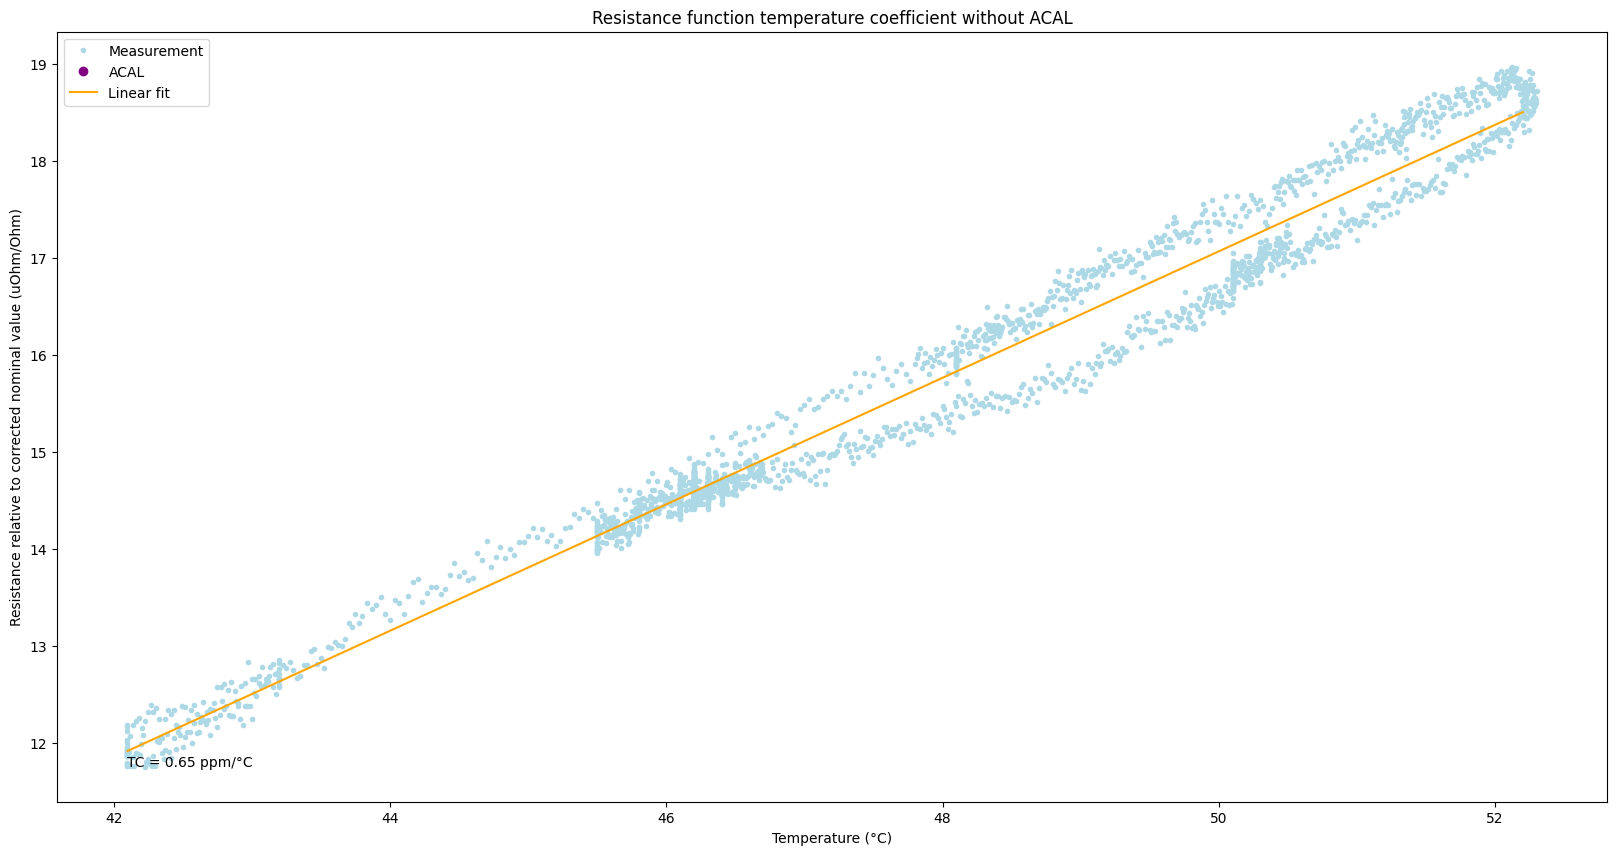

In [20]:
process_sr104_k2000x2(ks3458a2_wo_acal, 2, False)

## HP 3458A #2 DCV ACAL (since it has a lower LTZ1000 setpoint)

In [21]:
def clean_dcv_tc(data, ks3458a_number):
    cleaned = data.copy()
    cleaned[f'temp_{ks3458a_number}_interpolated'] = cleaned[f'temp_{ks3458a_number}'].interpolate()
    cleaned[f'dcv_{ks3458a_number}_ppm'] = (cleaned[f'ag3458a_{ks3458a_number}_dcv'] - 10) / 10 * 1e6
    return cleaned

def plot_dcv_tc(data, ks3458a_number):
    fit_data = data.dropna()
    regressor = LinearRegression()
    ks3458a_temp_column = f'temp_{ks3458a_number}_interpolated'
    ppm_column = f'dcv_{ks3458a_number}_ppm'
    regressor.fit(fit_data[ks3458a_temp_column].values.reshape(-1, 1), fit_data[ppm_column])
    temps = np.arange(data[ks3458a_temp_column].min(), data[ks3458a_temp_column].max(), 0.1)
    plt.title('LTZ1000 temperature coefficient')
    plt.plot(data[ks3458a_temp_column], data[ppm_column], 'o', label='Measurement at ACAL')
    plt.plot(temps, regressor.predict(temps.reshape(-1, 1)), label="Linear fit")
    plt.legend()
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Deviation from 10V (uV/V)')
    plt.text(data[ks3458a_temp_column].min(), data[ppm_column].min(), f"TC = {regressor.coef_[0]:.2e} ppm/°C")

def process_dcv_tc(data, ks3458a_number):
    cleaned = clean_dcv_tc(data, ks3458a_number)
    only_acal = filter_acal_points(cleaned, ks3458a_number)
    plot_dcv_tc(only_acal, ks3458a_number)

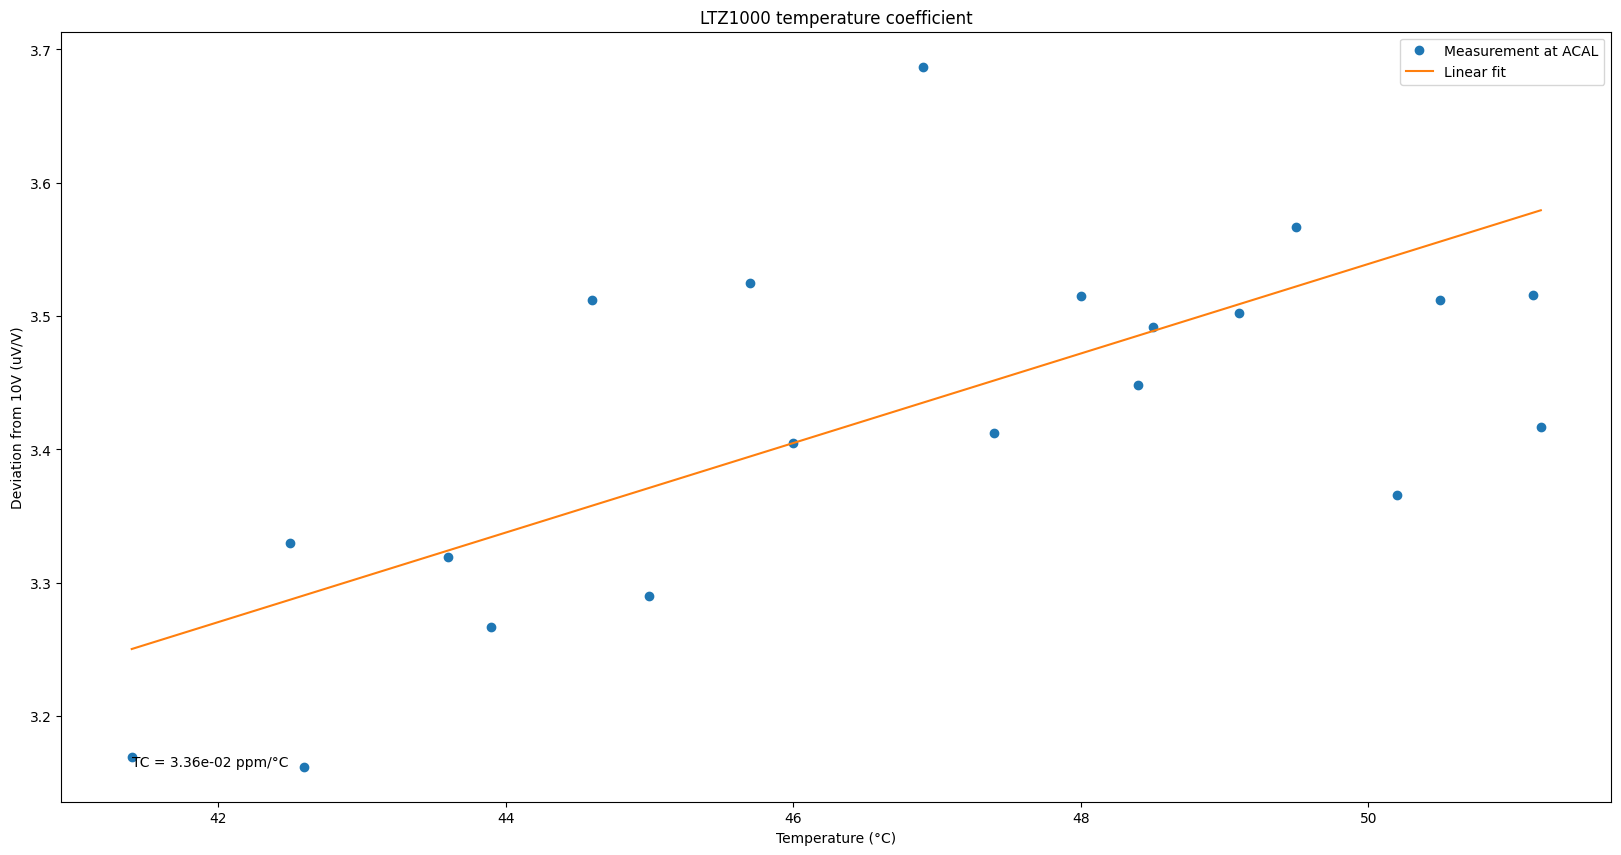

In [22]:
process_dcv_tc(ks3458a_dc_w_acal, 2)